**1.Using any language (Python is preferred), write code to connect to the provided database

In [1]:
import sqlite3
import requests
import os
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from configparser import ConfigParser
import json

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# conn= sqlite3.connect('movies.db')
conn= sqlite3.connect('movies.db', isolation_level=None)
cur=conn.cursor()

In [3]:
movie_df= pd.read_sql("select * from movies", conn)
table_list= pd.read_sql("""SELECT name FROM sqlite_master 
WHERE type = 'table' 
AND name NOT LIKE 'sqlite_%'
ORDER BY 1""", conn)

In [32]:
table_list
# conn.commit()

,name
0,audit_movies_cleaned
1,movies
2,movies_cleaned


In [116]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [184]:
movie_df.head(1)

,id,movie_title,movie_facebook_likes,color,director_name,prolific_director,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,prolific_actor_1,prolific_actor_2,prolific_actor_3,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,budget,gross,genres,num_critic_for_reviews,num_voted_users,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,title_year,imdb_score,oscar_nom_movie,oscar_nom_actor,duration,aspect_ratio
0,1,Intolerance: Love's Struggle Throughout the Ages,691,Black and White,D.W. Griffith,1,204,Lillian Gish,Mae Marsh,Walter Long,2,1,1,436.0,22.0,9.0,385907.0,NaN,Drama|History|War,69.0,10718.0,1.0,huguenot|intolerance|medicis|protestant|wedding,http://www.imdb.com/title/tt0006864/?ref_=fn_t...,88.0,None,USA,NaN,1916,8,0,1,123,1.33


In [141]:
movie_df.columns

Index(['id', 'movie_title', 'movie_facebook_likes', 'color', 'director_name',
       'prolific_director', 'director_facebook_likes', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'prolific_actor_1', 'prolific_actor_2',
       'prolific_actor_3', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
       'actor_3_facebook_likes', 'budget', 'gross', 'genres',
       'num_critic_for_reviews', 'num_voted_users', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'title_year', 'imdb_score',
       'oscar_nom_movie', 'oscar_nom_actor', 'duration', 'aspect_ratio'],
      dtype='object')

In [203]:
movie_df.shape[0]

4639

**3.Perform any necessary data cleansing, as well as some simple exploratory analysis -- whatever steps you would normally take in order to get a sense of what is in a new data set.


## cleaning problematic data

**making datatype conversions for numerical columns to get better understanding
**converting blank fields to null, for beter calculations

In [4]:
import numpy as np

movie_df= movie_df.replace('NA',"").replace(r'^\s*$', np.nan, regex=True)

cols=['actor_1_facebook_likes', 'actor_2_facebook_likes',
      'actor_3_facebook_likes','budget', 'gross','num_critic_for_reviews', 
      'num_voted_users', 'facenumber_in_poster','num_user_for_reviews', 
      'title_year', 'imdb_score','duration']

# movie_df= movie_df.replace('NA',"").replace(r'^\s*$', np.nan, regex=True)


for feature in cols:
#     print(feature)
    movie_df[feature]= movie_df[feature].astype(float)
#     normalising the data
#     movie_df[feature]= movie_df[feature].fillna(np.mean(movie_df[feature]))

In [34]:
# getting idea of the data
movie_df.describe()

,id,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,budget,gross,num_critic_for_reviews,num_voted_users,facenumber_in_poster,num_user_for_reviews,title_year,imdb_score,duration
count,4639.000000,4.639000e+03,4630.000000,4621.000000,4.263000e+03,3.921000e+03,4603.000000,4.639000e+03,4626.000000,4626.000000,4627.000000,4639.000000,4627.000000
mean,2367.042466,2.556111e+06,1660.620302,640.880762,3.976976e+07,4.793853e+07,141.357158,8.444523e+04,1.373541,273.615651,2002.422304,6.410972,108.596283
std,1367.886679,1.020785e+07,4085.036524,1652.248738,2.125343e+08,6.777317e+07,121.010177,1.405093e+05,2.036665,378.413407,12.475959,1.118143,23.388095
min,1.000000,0.000000e+00,0.000000,0.000000,2.180000e+02,1.620000e+02,1.000000,5.000000e+00,0.000000,1.000000,1916.000000,1.600000,62.000000
25%,1182.500000,6.640000e+02,282.500000,136.000000,6.000000e+06,5.306447e+06,52.000000,8.899500e+03,0.000000,68.000000,1999.000000,5.800000,94.000000
50%,2367.000000,1.000000e+03,597.000000,371.000000,2.000000e+07,2.509361e+07,112.000000,3.456100e+04,1.000000,158.500000,2005.000000,6.500000,104.000000
75%,3551.500000,2.200000e+04,919.750000,636.000000,4.400000e+07,6.140000e+07,195.000000,9.597800e+04,2.000000,326.750000,2011.000000,7.200000,118.000000
max,4734.000000,1.012630e+08,137000.000000,23000.000000,1.221550e+10,7.605058e+08,813.000000,1.689764e+06,43.000000,5060.000000,2016.000000,9.500000,511.000000


In [74]:
movie_df.genres
movie_df.columns
movie_df[['id','movie_title']]
movie_df[['genres']]

,genres
0,Drama|History|War
1,Crime|Drama
2,Drama|Romance|War
3,Drama|Sci-Fi
4,Musical|Romance
...,...
4634,Drama|History|Thriller
4635,Biography|Crime|Drama|Thriller
4636,Crime|Drama|Thriller
4637,Documentary


In [152]:
movie_df

,id,movie_title,movie_facebook_likes,color,director_name,prolific_director,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,prolific_actor_1,prolific_actor_2,prolific_actor_3,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,budget,gross,genres,num_critic_for_reviews,num_voted_users,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,title_year,imdb_score,oscar_nom_movie,oscar_nom_actor,duration,aspect_ratio
0,1,Intolerance: Love's Struggle Throughout the Ages,691,Black and White,D.W. Griffith,1,204,Lillian Gish,Mae Marsh,Walter Long,2,1,1,436.00,22.00,9.00,385907.00,nan,Drama|History|War,69.00,10718.00,1.00,huguenot|intolerance|medicis|protestant|wedding,http://www.imdb.com/title/tt0006864/?ref_=fn_t...,88.00,None,USA,Unrated,1916.00,8.00,0,1,123.00,1.33
1,2,Over the Hill to the Poorhouse,0,Black and White,Harry F. Millarde,1,0,Stephen Carr,Johnnie Walker,Mary Carr,1,1,1,2.00,2.00,0.00,100000.00,3000000.00,Crime|Drama,1.00,5.00,1.00,family relationships|gang|idler|poorhouse|thief,http://www.imdb.com/title/tt0011549/?ref_=fn_t...,1.00,None,USA,Missing,1920.00,4.80,0,0,110.00,1.33
2,3,The Big Parade,226,Black and White,King Vidor,3,54,John Gilbert,RenÃ©e AdorÃ©e,Claire Adams,1,1,1,81.00,12.00,6.00,245000.00,nan,Drama|Romance|War,48.00,4849.00,0.00,chewing gum|climbing a tree|france|translation...,http://www.imdb.com/title/tt0015624/?ref_=fn_t...,45.00,None,USA,Unrated,1925.00,8.30,0,0,151.00,1.33
3,4,Metropolis,12000,Black and White,Fritz Lang,1,756,Brigitte Helm,Gustav FrÃ¶hlich,Rudolf Klein-Rogge,1,1,1,136.00,23.00,18.00,6000000.00,26435.00,Drama|Sci-Fi,260.00,111841.00,1.00,art deco|bible quote|dance|silent film|worker,http://www.imdb.com/title/tt0017136/?ref_=fn_t...,413.00,German,Germany,Unrated,1927.00,8.30,0,0,145.00,1.33
4,5,The Broadway Melody,1718,Black and White,Harry Beaumont,1,4,Anita Page,Bessie Love,Charles King,1,1,1,1718.00,28.00,4.00,379000.00,2808000.00,Musical|Romance,36.00,4546.00,8.00,sibling rivalry|singer|sister act|whistling|wi...,http://www.imdb.com/title/tt0019729/?ref_=fn_t...,71.00,English,USA,PG,1929.00,6.30,2,1,100.00,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4634,4730,The Company,73570,Color,NaN,0,NaN,Anna Silk,Tom Hollander,Alessandro Nivola,1,4,4,73570.00,555.00,527.00,nan,nan,Drama|History|Thriller,9.00,3828.00,3.00,cia|mole|revolution|spy|ussr,http://www.imdb.com/title/tt0488352/?ref_=fn_t...,39.00,English,USA,Missing,nan,7.90,0,0,286.00,1.78
4635,4731,Carlos,0,Color,NaN,0,NaN,Edgar RamÃ­rez,Nora von WaldstÃ¤tten,Katharina SchÃ¼ttler,8,1,1,897.00,30.00,30.00,nan,145118.00,Biography|Crime|Drama|Thriller,108.00,10111.00,0.00,opec|pubic hair|revolutionary|terrorism|true c...,http://www.imdb.com/title/tt1321865/?ref_=fn_t...,36.00,English,France,Unrated,nan,7.70,0,0,334.00,2.35
4636,4732,Trapped,0,Color,NaN,0,NaN,Ãlafur Darri Ãlafsson,Ingvar Eggert SigurÃ°sson,BjÃ¶rn Hlynur Haraldsson,1,2,1,147.00,63.00,51.00,nan,nan,Crime|Drama|Thriller,16.00,2308.00,0.00,coastal town|iceland|police|snowstorm|winter s...,http://www.imdb.com/title/tt3561180/?ref_=fn_t...,19.00,Icelandic,Iceland,Missing,nan,8.20,0,0,511.00,16
4637,4733,Star Wars: Episode VII - The Force Awakens,0,Missing,Doug Walker,1,131,Doug Walker,Rob Walker,Unknown,1,1,?,131.00,12.00,nan,nan,nan,Documentary,nan,8.00,0.00,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,nan,English,USA,Missing,nan,7.10,0,0,nan,Missing


In [70]:
# new_df= movie_df.groupby(['id','movie_title']).size().to_frame().reset_index()
new_df= movie_df.groupby(['id']).size().to_frame().reset_index()

In [71]:
new_df[new_df[0]>1]

,id,0


In [58]:
movie_df.isna().sum()

id                           0
movie_title                  0
movie_facebook_likes         0
color                        0
director_name               10
prolific_director            0
director_facebook_likes     10
actor_1_name                 0
actor_2_name                 0
actor_3_name                 0
prolific_actor_1             0
prolific_actor_2             0
prolific_actor_3             0
actor_1_facebook_likes       0
actor_2_facebook_likes       9
actor_3_facebook_likes      18
budget                     376
gross                      718
genres                       0
num_critic_for_reviews      36
num_voted_users              0
facenumber_in_poster        13
plot_keywords              129
movie_imdb_link              0
num_user_for_reviews        13
language                     0
country                      0
content_rating               0
title_year                  12
imdb_score                   0
oscar_nom_movie              0
oscar_nom_actor              0
duration

In [35]:
newDf= pd.DataFrame([x.split('|') for x in movie_df['genres'].tolist()]).fillna('')
for col_num in newDf.columns:
    newDf.rename(columns= {col_num: 'genre_id{}'.format(col_num)}, inplace=True)
genre_cols=list(newDf.columns)
new_movie_df= pd.concat([movie_df,newDf], axis=1)
print(newDf.columns)
key_cols= ['id','movie_title']
melt_cols= key_cols+genre_cols
# print(new_movie_df.columns)
new_movie_df= new_movie_df[melt_cols]
binary_genre_df= new_movie_df.melt(id_vars=key_cols, var_name="genres")
binary_genre_df= binary_genre_df.pivot_table(index= ['id','movie_title'], columns= 'value', values= 'genres', aggfunc= 'count').reset_index()
binary_genre_df.drop(columns= '', inplace=True)
binary_genre_df.rename_axis(None,axis=1, inplace=True)
binary_genre_df.fillna('False', inplace=True)
binary_genre_df= binary_genre_df.astype(str)
binary_genre_df= binary_genre_df.replace("1.0",'True')
binary_genre_df['id']=binary_genre_df['id'].astype(int)

final_df_with_bool_genres= pd.merge(movie_df, binary_genre_df, on=['id', 'movie_title'], how='left')

Index(['genre_id0', 'genre_id1', 'genre_id2', 'genre_id3', 'genre_id4',
       'genre_id5', 'genre_id6', 'genre_id7'],
      dtype='object')


In [162]:
movie_df.head(2)
# movie_df.dtypes

,id,movie_title,movie_facebook_likes,color,director_name,prolific_director,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,prolific_actor_1,prolific_actor_2,prolific_actor_3,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,budget,gross,genres,num_critic_for_reviews,num_voted_users,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,title_year,imdb_score,oscar_nom_movie,oscar_nom_actor,duration,aspect_ratio
0,1,Intolerance: Love's Struggle Throughout the Ages,691,Black and White,D.W. Griffith,1,204,Lillian Gish,Mae Marsh,Walter Long,2,1,1,436.00,22.00,9.00,385907.00,nan,Drama|History|War,69.00,10718.00,1.00,huguenot|intolerance|medicis|protestant|wedding,http://www.imdb.com/title/tt0006864/?ref_=fn_t...,88.00,None,USA,Unrated,1916.00,8.00,0,1,123.00,1.33
1,2,Over the Hill to the Poorhouse,0,Black and White,Harry F. Millarde,1,0,Stephen Carr,Johnnie Walker,Mary Carr,1,1,1,2.00,2.00,0.00,100000.00,3000000.00,Crime|Drama,1.00,5.00,1.00,family relationships|gang|idler|poorhouse|thief,http://www.imdb.com/title/tt0011549/?ref_=fn_t...,1.00,None,USA,Missing,1920.00,4.80,0,0,110.00,1.33


In [163]:
binary_genre_df.head(2)
# binary_genre_df.dtypes

,id,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,Intolerance: Love's Struggle Throughout the Ages,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,2,Over the Hill to the Poorhouse,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [144]:
# getting nulls in data
movie_df.isnull().sum()

id                           0
movie_title                  0
movie_facebook_likes         0
color                        0
director_name               10
prolific_director            0
director_facebook_likes     10
actor_1_name                 0
actor_2_name                 0
actor_3_name                 0
prolific_actor_1             0
prolific_actor_2             0
prolific_actor_3             0
actor_1_facebook_likes       0
actor_2_facebook_likes       9
actor_3_facebook_likes      18
budget                     376
gross                      718
genres                       0
num_critic_for_reviews      36
num_voted_users              0
facenumber_in_poster        13
plot_keywords              129
movie_imdb_link              0
num_user_for_reviews        13
language                     0
country                      0
content_rating               0
title_year                  12
imdb_score                   0
oscar_nom_movie              0
oscar_nom_actor              0
duration

In [262]:
movie_df[movie_df.imdb_score==9.50]

,id,movie_title,movie_facebook_likes,color,director_name,prolific_director,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,prolific_actor_1,prolific_actor_2,prolific_actor_3,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,budget,gross,genres,num_critic_for_reviews,num_voted_users,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,title_year,imdb_score,oscar_nom_movie,oscar_nom_actor,duration,aspect_ratio
4627,4722,Towering Inferno,0,Color,John Blanchard,1,0,Martin Short,Andrea Martin,Joe Flaherty,7,5,2,770.00,179.00,176.00,nan,nan,Comedy,nan,10.00,2.00,NaN,http://www.imdb.com/title/tt0691996/?ref_=fn_t...,nan,English,Canada,Missing,nan,9.50,0,0,65.00,1.33


## identifying outliers

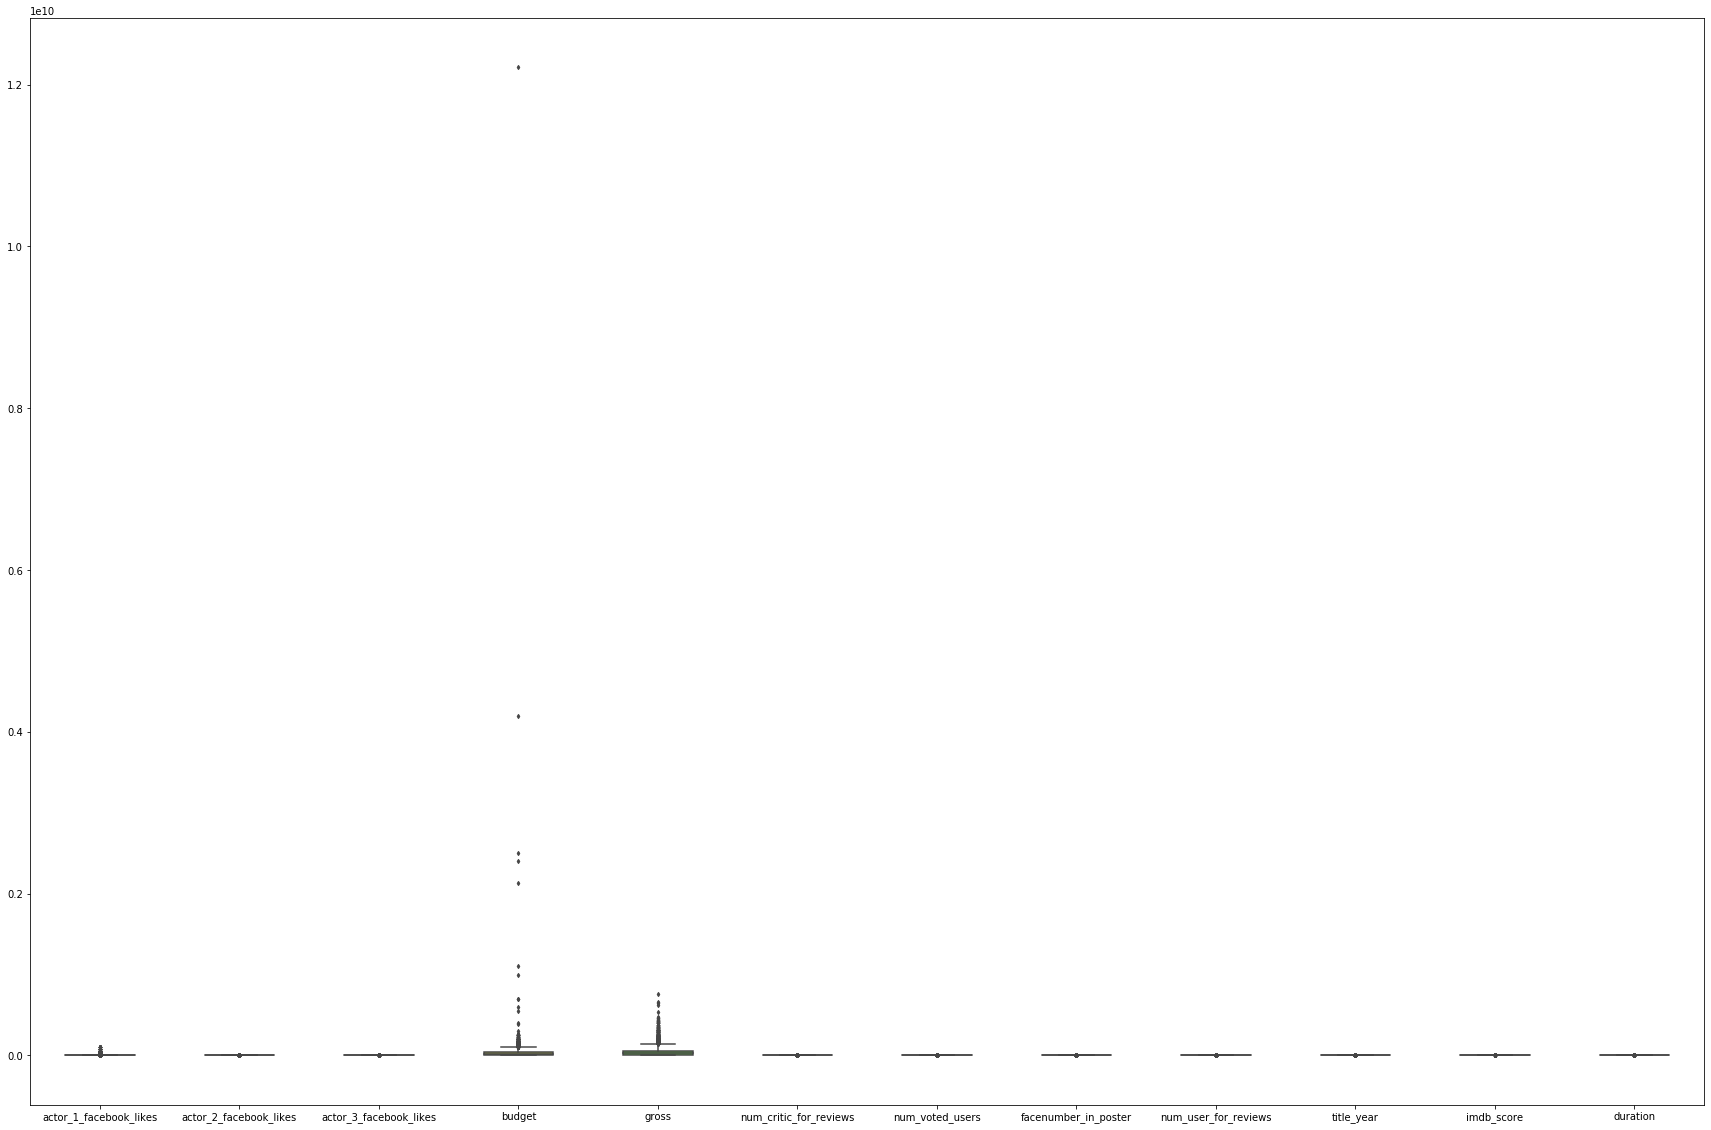

In [36]:
new_movie_df= movie_df[cols]
fig, ax = plt.subplots(figsize=(30,20))
sns.boxplot(data=new_movie_df, width= 0.5,ax=ax,  fliersize=3)

**2.Use the provided OMDb API key to query the Open Movie Database and obtain any and all additional metrics to enrich the dataset. 

In [37]:
import requests
import json
import pandas as pd
def get_movie_details(row, apiKey):
#     apiKey= '273f5165'
    apiKey= apiKey
    data_URL = 'http://www.omdbapi.com/?apikey='+apiKey
    year = '' 
    movie= row['movie_title']
    paramss = {
        't':movie,
        'y':year
    }
    resp=requests.get(data_URL,params=paramss)
    dict_strn= json.loads(resp.text)
    print(row['movie_title'])
    if (dict_strn['Response']=='True'):
        row['imdbID']= dict_strn['imdbID']
        row['Released_Date']= dict_strn['Released']
        row['Type']= dict_strn['Type']
    else:
        row['imdbID']= dict_strn['Error']
        row['Released_Date']= dict_strn['Error']
        row['Type']= dict_strn['Error']
    return row

In [39]:
apiKey= '273f5165'
new_movie_df= final_df_with_bool_genres.head(10)
new_movie_df= new_movie_df.apply(lambda row: get_movie_details(row,apiKey), axis=1)

Intolerance: Love's Struggle Throughout the Ages
Over the Hill to the Poorhouse
The Big Parade
Metropolis
The Broadway Melody
Pandora's Box
Hell's Angels
A Farewell to Arms
She Done Him Wrong
42nd Street


## insert data into db

In [27]:
final_df_with_bool_genres.isna().sum()

NameError: name 'final_df_with_bool_genres' is not defined

In [49]:
def insert_data(df_name, table_name, cur, conn):
    columns= ','.join(['"'+str(i)+'"' for i in list(df_name.columns)])
    query_placeholders= ','.join(['?']  * len(df_name.columns))
    table_name= table_name
    insert_sql= 'insert into ' + table_name + '(' + columns + ') values (' +  query_placeholders + ')'
    rec_count=0
    commit_ctr=0
    conn= conn
    for index, data in df_name.iterrows():
        try:
            cur.execute(insert_sql, tuple(data))
            rec_count+=1
#             conn.commit()
            commit_ctr+=1
            if commit_ctr==500:
                conn.commit()
                commit_ctr=0
        except Exception as e:
            print(insert_sql, " index= ", index, "data= ", tuple(data))
            print(e)
    return rec_count

In [40]:
test_df= new_movie_df.head(20)

In [41]:
for feature in cols:
    test_df[feature]= test_df[feature].fillna(-1).astype(int).astype(str).replace("-1.0","")

In [9]:
cur.execute("""
create table if not exists movies_cleaned(
id INT,
movie_title char(50),
movie_facebook_likes char(50),
color char(50),
director_name char(50),
prolific_director char(50),
director_facebook_likes char(50),
actor_1_name char(50),
actor_2_name char(50),
actor_3_name char(50),
prolific_actor_1 char(50),
prolific_actor_2 char(50),
prolific_actor_3 char(50),
actor_1_facebook_likes char(50),
actor_2_facebook_likes char(50),
actor_3_facebook_likes char(50),
budget char(50),
gross char(50),
genres char(50),
num_critic_for_reviews char(50),
num_voted_users char(50),
facenumber_in_poster char(50),
plot_keywords char(50),
movie_imdb_link char(50),
num_user_for_reviews char(50),
language char(50),
country char(50),
content_rating char(50),
title_year char(50),
imdb_score char(50),
oscar_nom_movie char(50),
oscar_nom_actor char(50),
duration char(50),
aspect_ratio char(50),
Action char(50),
Adventure char(50),
Animation char(50),
Biography char(50),
Comedy char(50),
Crime char(50),
Documentary char(50),
Drama char(50),
Family char(50),
Fantasy char(50),
"Film-Noir" char(50),
History char(50),
Horror char(50),
Music char(50),
Musical char(50),
Mystery char(50),
News  char(50),
Romance char(50),
"Sci-Fi" char(50),
Sport char(50),
Thriller char(50),
War char(50),
Western char(50),
imdbID char(50),
Released_Date char(50),
Type char(50),
PRIMARY KEY(id, movie_title))
""")
conn.commit()

In [8]:
cur.execute("""
create table if not exists audit_movies_cleaned(
id INTEGER PRIMARY KEY AUTOINCREMENT,
job_starttime datetime,
job_endtime datetime,
records_extracted_raw int,
records_ingested_cleaned int,
latest_movie_date DATE)
""")
conn.commit()

In [6]:
cur.execute("""
drop table if exists movies_cleaned
""")
conn.commit()

In [7]:
cur.execute("""
drop table if exists audit_movies_cleaned
""")
conn.commit()

In [5]:
cur.execute("""
delete from movies_cleaned
""")
conn.commit()

In [47]:
job_start= pd.to_datetime('now').strftime('%Y-%m-%d %H:%M')

In [61]:
rec_inserted= insert_data(test_df,'movies_cleaned', cur, conn)

insert into movies_cleaned("id","movie_title","movie_facebook_likes","color","director_name","prolific_director","director_facebook_likes","actor_1_name","actor_2_name","actor_3_name","prolific_actor_1","prolific_actor_2","prolific_actor_3","actor_1_facebook_likes","actor_2_facebook_likes","actor_3_facebook_likes","budget","gross","genres","num_critic_for_reviews","num_voted_users","facenumber_in_poster","plot_keywords","movie_imdb_link","num_user_for_reviews","language","country","content_rating","title_year","imdb_score","oscar_nom_movie","oscar_nom_actor","duration","aspect_ratio","Action","Adventure","Animation","Biography","Comedy","Crime","Documentary","Drama","Family","Fantasy","Film-Noir","History","Horror","Music","Musical","Mystery","News","Romance","Sci-Fi","Sport","Thriller","War","Western","imdbID","Released_Date","Type") values (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)  index=  0 data=  (1, "I

In [52]:
records_extracted_raw= len(movie_df.index)
records_ingested_cleaned= rec_inserted
job_end= pd.to_datetime('now').strftime('%Y-%m-%d %H:%M')
latest_movie_date= max(pd.to_datetime(test_df.Released_Date.replace('N/A','01 Jan 1800')))

In [66]:
dataa= [job_start,job_end,records_extracted_raw,records_ingested_cleaned,latest_movie_date]
columnss= ['job_starttime','job_endtime','records_extracted_raw','records_ingested_cleaned','latest_movie_date']
audit_dataframe= pd.DataFrame(data= [data], columns= columnss)

In [68]:
audit_rec_inserted= insert_data(audit_dataframe,'audit_movies_cleaned', cur, conn)

In [58]:
test_df.Released_Date

0    01 Oct 1916
1    26 Jun 1908
2            N/A
3    13 Mar 1927
4    06 Jun 1929
5    22 Feb 1930
6    15 Nov 1930
7    08 Dec 1932
8    09 Feb 1933
9    11 Mar 1933
Name: Released_Date, dtype: object

In [60]:
max(pd.to_datetime(test_df.Released_Date.replace('N/A','01 Jan 1800')))

Timestamp('1933-03-11 00:00:00')

In [170]:
conn.commit()

In [9]:
cur.execute("""
delete from movies_cleaned
""")
conn.commit()

In [133]:
df1= pd.read_sql("select * from movies_cleaned",conn)

In [130]:
rec_inserted

4639

In [134]:
df1.head(10)

,id,movie_title,movie_facebook_likes,color,director_name,prolific_director,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,...,News,Romance,Sci-Fi,Sport,Thriller,War,Western,imdbID,Released_Date,Type
0,1,Intolerance: Love's Struggle Throughout the Ages,691,Black and White,D.W. Griffith,1,204,Lillian Gish,Mae Marsh,Walter Long,...,False,False,False,False,False,True,False,None,None,None
1,2,Over the Hill to the Poorhouse,0,Black and White,Harry F. Millarde,1,0,Stephen Carr,Johnnie Walker,Mary Carr,...,False,False,False,False,False,False,False,None,None,None
2,3,The Big Parade,226,Black and White,King Vidor,3,54,John Gilbert,RenÃ©e AdorÃ©e,Claire Adams,...,False,True,False,False,False,True,False,None,None,None
3,4,Metropolis,12000,Black and White,Fritz Lang,1,756,Brigitte Helm,Gustav FrÃ¶hlich,Rudolf Klein-Rogge,...,False,False,True,False,False,False,False,None,None,None
4,5,The Broadway Melody,1718,Black and White,Harry Beaumont,1,4,Anita Page,Bessie Love,Charles King,...,False,True,False,False,False,False,False,None,None,None
5,6,Pandora's Box,926,Black and White,Georg Wilhelm Pabst,1,21,Louise Brooks,Francis Lederer,Fritz Kortner,...,False,True,False,False,False,False,False,None,None,None
6,7,Hell's Angels,279,Black and White,Howard Hughes,1,177,Jean Harlow,Marian Marsh,James Hall,...,False,False,False,False,False,True,False,None,None,None
7,8,A Farewell to Arms,213,Black and White,Frank Borzage,1,57,Gary Cooper,Helen Hayes,Adolphe Menjou,...,False,True,False,False,False,True,False,None,None,None
8,9,She Done Him Wrong,328,Black and White,Lowell Sherman,1,16,Mae West,Gilbert Roland,Louise Beavers,...,False,True,False,False,False,False,False,None,None,None
9,10,42nd Street,3438,Black and White,Lloyd Bacon,1,24,Ginger Rogers,Dick Powell,George Brent,...,False,True,False,False,False,False,False,None,None,None
